In [1]:
import numpy as np
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
np.random.seed(123)

def line(x, pars, err=False):
    '''creates points in a line
    Arguments:
    x: array of IV values
    par: series containing values a,b for ax + b
    Output:
    array of y values
    '''
    if err:
        err = np.random.randn(len(x)) * err
    else:
        err = np.zeros_like(x)
    return (pars[0] * x + pars[1]) + err, err


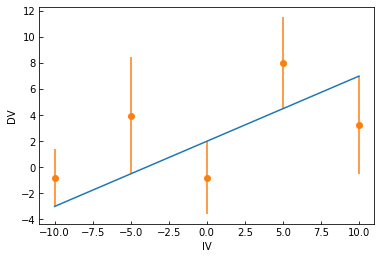

In [83]:
#model
par1 = (0.5, 2)
x_model = np.linspace(-10,10,100)
y_model, e_model = line(x_model, par1)
pl.plot(x_model, y_model, '-')

#data
x = np.linspace(-10,10,5)
y, e = line(x, par1, err=3)
pl.errorbar(x, y, yerr=e, fmt='o')
yl = pl.xlabel('IV')
xl = pl.ylabel('DV')

In [24]:
import statsmodels.api as sm


In [28]:
print(x)
print (sm.add_constant(x))

[-10.  -5.   0.   5.  10.]
[[  1. -10.]
 [  1.  -5.]
 [  1.   0.]
 [  1.   5.]
 [  1.  10.]]


In [30]:
lres = sm.OLS(y, x).fit()
lres.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.514
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.286
Time:                        10:51:30   Log-Likelihood:                -16.094
No. Observations:                   5   AIC:                             34.19
Df Residuals:                       4   BIC:                             33.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5264      0.428      1.231      0.286        -0.661     1.714
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.427
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.518
Skew:                          -0.049   Prob(JB):                        0.772
Kurtosis:                       1.427   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Container object of 3 artists>

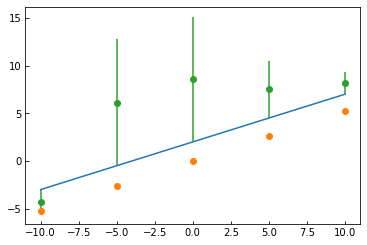

In [32]:
pl.plot(x_model, y_model, '-')
pl.plot(x, lres.predict(x), 'o')
pl.errorbar(x, y, yerr=e, fmt='o')

In [34]:
lres = sm.OLS(y, sm.add_constant(x)).fit()
lres.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     4.395
Date:                Tue, 11 Oct 2016   Prob (F-statistic):              0.127
Time:                        10:54:33   Log-Likelihood:                -12.711
No. Observations:                   5   AIC:                             29.42
Df Residuals:                       3   BIC:                             28.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.2092      1.775      2.934      0.061        -0.441    10.859
x1             0.5264      0.251      2.096      0.127        -0.273     1.325
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.654
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.518
Skew:                          -0.049   Prob(JB):                        0.772
Kurtosis:                       1.427   Cond. No.                         7.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
e

array([-1.30305383,  6.61779025,  6.56035827,  3.01216169,  1.1585592 ])

In [53]:
wres = sm.WLS(y, sm.add_constant(x), weights=np.abs(1.0/e)).fit()

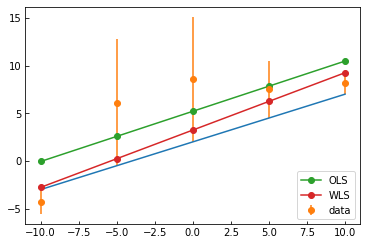

In [54]:
pl.plot(x_model, y_model, '-')
pl.errorbar(x, y, yerr=e, fmt='o', label = 'data')
pl.plot(x, lres.predict(sm.add_constant(x)), '-o', label = 'OLS')
pl.plot(x, wres.predict(sm.add_constant(x)), '-o', label = 'WLS')
leg = pl.legend(loc = 4)

In [61]:
import statsmodels.formula.api as smf
import pandas as pd

In [62]:
dataDF = pd.DataFrame()

In [71]:
dataDF['x'] = x
dataDF['x2'] = x * x
dataDF['y'] = y
dataDF

,x,y,x2
0,-10,-4.303054,100
1,-5,6.117790,25
2,0,8.560358,0
3,5,7.512162,25
4,10,8.158559,100


In [72]:
fres = smf.ols(formula = 'y ~ x2 + x', data=dataDF).fit()
fres.summary()

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     11.45
Date:                Tue, 11 Oct 2016   Prob (F-statistic):             0.0803
Time:                        11:13:08   Log-Likelihood:                -8.6631
No. Observations:                   5   AIC:                             23.33
Df Residuals:                       2   BIC:                             22.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.5005      1.508      5.637      0.030         2.012    14.989
x2            -0.0658      0.023     -2.846      0.104        -0.165     0.034
x              0.5264      0.137      3.846      0.061        -0.062     1.115
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.601
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.355
Skew:                          -0.066   Prob(JB):                        0.837
Kurtosis:                       1.702   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

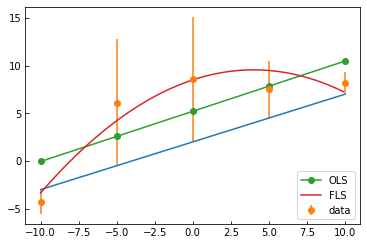

In [82]:
pl.plot(x_model, y_model, '-')
pl.errorbar(x, y, yerr=e, fmt='o', label = 'data')
pl.plot(x, lres.predict(sm.add_constant(x)), '-o', label = 'OLS')

dfnew = pd.DataFrame()
dfnew['x'] = np.arange(x.min(), x.max(), 0.1)
dfnew['x2'] = dfnew['x'] * dfnew['x']

pl.plot(dfnew['x'], 
        fres.predict(dfnew), '-', label = 'FLS')
leg = pl.legend(loc = 4)

In [75]:
fres.predict?